In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#### Two actions: A (risky) and B (safe)
#### A gives +5 reward 40% of the time, -5 otherwise.
#### B gives +1 reward always.

In [6]:
def get_reward(action):
    if action == 0: #risky
        return 5 if np.random.rand() < 0.4 else -5
    else:
        return 1

n_actions = 2
n_episodes = 300
epsilon = 0.1
alpha = 0.1
gamma = 0.9


In [7]:
def run_agent(loss_aversion = False,optimism_bias = False):
    Q = np.zeros(n_actions)
    rewards = []

    for ep in range(n_episodes):
        if np.random.rand() < epsilon:
            action = np.random.randint(n_actions)
        else:
            action = np.argmax(Q)
        reward = get_reward(action)
        if loss_aversion and reward < 0:
            reward *= 2.0     # exaggerate losses
        if optimism_bias and reward > 0:
            reward *= 1.3   # inflate positive outcomes
        Q[action] += alpha * (reward + gamma * np.max(Q) - Q[action])
        rewards.append(reward)
    return np.array(rewards),Q

In [8]:
np.random.seed(42)
normal_rewards, normal_Q = run_agent()
loss_averse_rewards, la_Q = run_agent(loss_aversion=True)
optimistic_rewards, opt_Q = run_agent(optimism_bias=True)

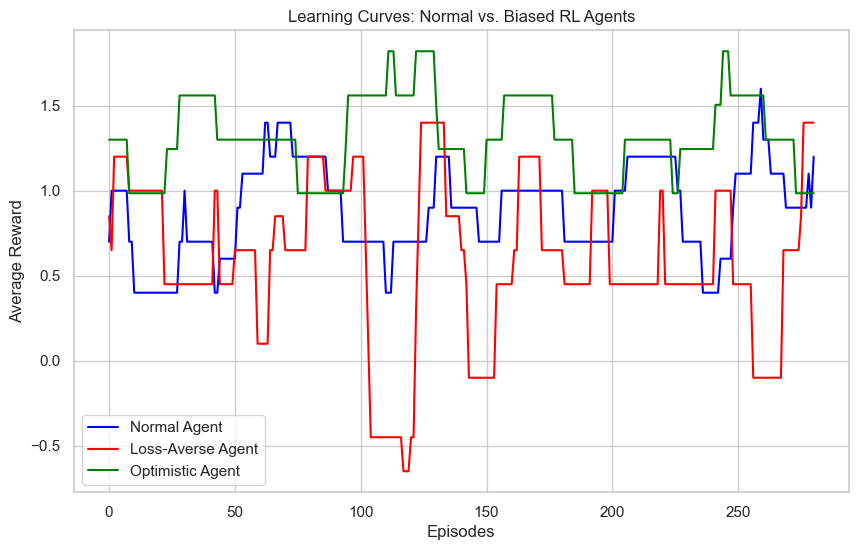

In [9]:
window = 20
def smooth(r): return np.convolve(r, np.ones(window)/window, mode='valid')

episodes = np.arange(len(smooth(normal_rewards)))

plt.figure(figsize=(10,6))
plt.plot(episodes, smooth(normal_rewards), label='Normal Agent', color='blue')
plt.plot(episodes, smooth(loss_averse_rewards), label='Loss-Averse Agent', color='red')
plt.plot(episodes, smooth(optimistic_rewards), label='Optimistic Agent', color='green')
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Learning Curves: Normal vs. Biased RL Agents")
plt.legend()
plt.show()

In [10]:
print("Final Q-values")
print(f"Normal Agent:     {normal_Q}")
print(f"Loss-Averse Agent:{la_Q}")
print(f"Optimistic Agent: {opt_Q}")

Final Q-values
Normal Agent:     [6.65651359 9.39435339]
Loss-Averse Agent:[2.97585759 9.37581445]
Optimistic Agent: [ 7.69525891 12.27348564]
